In [48]:
import numpy as np
import matplotlib.pyplot as plt

report = ''
with open('report.txt', 'r') as f:
    report = f.read().split('\n')

q_set = set()
p_set = set()
d_set = set()
c_set = set()

for line in report:
    if line == '':
        continue
    cat = line.split('_')
    q_set.add(cat[1])
    p_set.add(cat[2])
    d_set.add(cat[3])
    c_set.add(cat[4].split(';')[0])

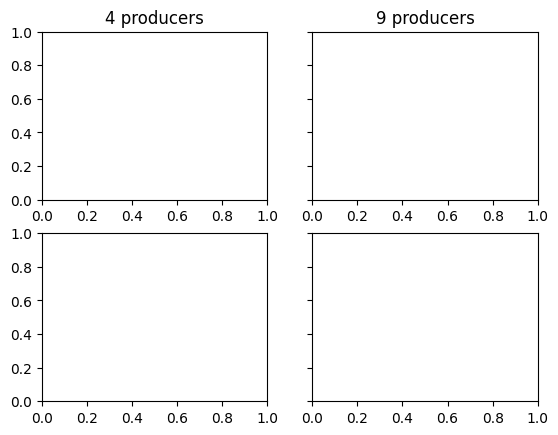

In [74]:
fig, axs = plt.subplots(2,2)
axs[0, 0].set_title('4 producers')
axs[0, 1].set_title('9 producers')
axs[0, 1].set(yticklabels=[])
axs[1, 1].set(yticklabels=[])

# turn into function
# parameters
ax = axs[0, 0]
cat = list(q_set)
cat.reverse()
y_0 = np.random.rand(len(cat))
y_128 = np.random.rand(len(cat))

# ax: rect
# cat: categories for bar chart
# ys: bars per category 
def plot_bar(ax, cat, ys):
    width = 0.25
    x = np.arange(len(cat))
    ax.bar(x - width / 2, y_0, width)
    ax.bar(x + width / 2, y_128, width)
    ax.set_xticks(x, cat)
    
plot_bar(axs[])